In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.widgets as widgets
import ipywidgets as widgets
import seaborn as sns

In [2]:
# Read in CSV and convert date column entries to datetime

df = pd.read_csv('./ProjectTweets.csv', names=['index', 'ids', 'date', 'flag', 'user', 'text'], parse_dates=['date'], index_col='date')
#df['date'] = df['date'].dt.tz_localize(None)
df.head()

/tmp/ipykernel_2037/4049922214.py:3: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv('./ProjectTweets.csv', names=['index', 'ids', 'date', 'flag', 'user', 'text'], parse_dates=['date'], index_col='date')


,index,ids,flag,user,text
date,,,,,
2009-04-06 22:19:45,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2009-04-06 22:19:49,1,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2009-04-06 22:19:53,2,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2009-04-06 22:19:57,3,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
2009-04-06 22:19:57,4,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.dtypes

index     int64
ids       int64
flag     object
user     object
text     object
dtype: object

In [4]:
# check for duplicate rows
df = df.drop_duplicates()

In [5]:
# Group by day and count the number of rows for each day, representing unique tweets
day_count = df.groupby(df.index.date)['text'].count().reset_index(name='tweet_count')

print(day_count)

         index  tweet_count
0   2009-04-06         3360
1   2009-04-07        17311
2   2009-04-17         3084
3   2009-04-18        21754
4   2009-04-19        27469
5   2009-04-20        18460
6   2009-04-21         8587
7   2009-05-01         7716
8   2009-05-02        27434
9   2009-05-03        35333
10  2009-05-04        15481
11  2009-05-09        11739
12  2009-05-10        26029
13  2009-05-11         4186
14  2009-05-13         4066
15  2009-05-14        17460
16  2009-05-16         9146
17  2009-05-17        40154
18  2009-05-18        36469
19  2009-05-21         2132
20  2009-05-22        39074
21  2009-05-23          169
22  2009-05-25          169
23  2009-05-26        10778
24  2009-05-27          841
25  2009-05-28        15903
26  2009-05-29        73827
27  2009-05-30       103673
28  2009-05-31        94588
29  2009-06-01       110290
30  2009-06-02        64192
31  2009-06-03        41588
32  2009-06-04         7842
33  2009-06-05        58757
34  2009-06-06      

In [6]:
day_count.dtypes

index          object
tweet_count     int64
dtype: object

In [7]:
day_count.index = pd.to_datetime(day_count['index'], format='%Y-%m-%d')
del day_count['index']

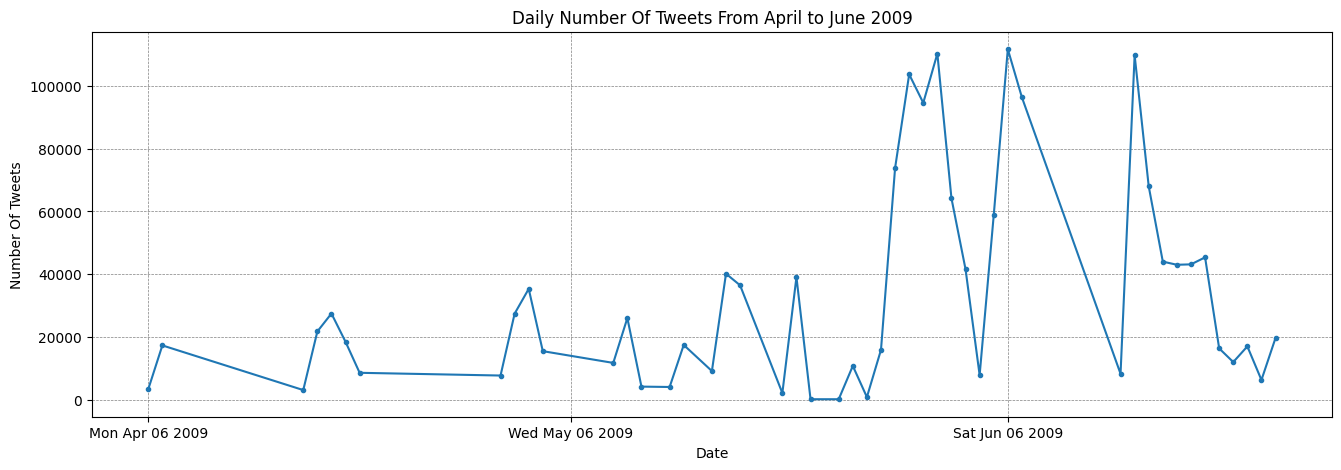

In [8]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number Of Tweets', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:blue', marker=".")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %b %d %Y'))
    plt.xticks(rotation=0)
    # create a locator for the first day of each month
    locator = mdates.MonthLocator(bymonthday=6)
    # apply the locator to the x-axis
    plt.gca().xaxis.set_major_locator(locator)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

plot_df(day_count, x=day_count.index, y=day_count.tweet_count, title='Daily Number Of Tweets From April to June 2009')